### Natural Language Processing

Gabriel Aldrich S. Calubayan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import numpy as np
from scipy import stats
import nltk

Genius Lyrics Dataset from: https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information/data

Relevant columns are the following (nonexhaustive):
* `title`
* `tag`
* `artist`
* `lyrics`
* `language`

In [4]:
# loading the filtered dataset
df = pd.read_csv('./filceb_lyrics.csv', engine='python')

**Checking missing values**

In [5]:
title_null_count = df["title"].isnull().sum()
tag_null_count = df["tag"].isnull().sum()
artist_null_count = df["artist"].isnull().sum()
lyrics_null_count = df["lyrics"].isnull().sum()
language_null_count = df["language"].isnull().sum()

print("Number of null values:")
print("Title:", title_null_count)
print("Tag:", title_null_count)
print("Artist:", title_null_count)
print("Lyrics:", title_null_count)
print("Language:", title_null_count)

Number of null values:
Title: 0
Tag: 0
Artist: 0
Lyrics: 0
Language: 0


**Lyrics cleanup - Ensuring Formatting consistency**

In [6]:
# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['lyrics'] = df['lyrics'].apply(remove_punctuation)

# Function to remove newlines
def remove_newlines(text):
    return text.replace('\n', ' ')

# Apply the function to the "lyrics" column
df['lyrics'] = df['lyrics'].apply(remove_newlines)

# Lowercase all lyrics
def lowercase_text(text):
    return text.lower()
df['lyrics'] = df['lyrics'].apply(lowercase_text)

# Remove song part markers e.g., [CHORUS], [Verse 1], (Loonie)
def remove_bracket_parenthesis_text(text):
    return re.sub(r'\[.*?\]|\(.*?\)', '', text)

df['lyrics'] = df['lyrics'].apply(remove_bracket_parenthesis_text)

def remove_song_parts(text):
    song_parts = ["chorus", "verse", "bridge", "coda", "refrain"] # we can add more later
    for word in song_parts:
        text = text.replace(word, '')
    return text
df['lyrics'] = df['lyrics'].apply(lambda x: remove_song_parts(x))

df.head

<bound method NDFrame.head of                                  title  tag        artist  year  views  \
0                             All star  rap  Enchant boyz  2012     27   
1                        Balak ni Syke  rap        Gloc-9  2012   2313   
2                       Apatnapungbara  rap        Gloc-9  2012   2423   
3                                Silup  rap        Gloc-9  2012   1392   
4     By Repablikan Syndicate Siobal D  rap     Pagbigyan  2012   2135   
...                                ...  ...           ...   ...    ...   
7287                  PANGHABANG-BUHAY  pop         Bradz  2022      7   
7288                             Totoo  pop        NOBITA  2022    176   
7289            Willow Smith Refine EP  rap   Crid Taylor  2022      2   
7290               ISSA VIBE REFINE EP  rap   Crid Taylor  2022      2   
7291          SATURDAY NIGHT REFINE EP  rap   Crid Taylor  2022      3   

                features                                             lyrics  \
0 

**Stopword removal and tokenization**

Filipino stopwords from [this repository](https://github.com/stopwords-iso/stopwords-tl). Cebuano stopwords from [this repository](https://github.com/digitalheir/cebuano-dictionary-js/tree/master)

In [7]:
from nltk.tokenize import word_tokenize

# remove Filipino stopwords in songs with "fil" language value
fil_sw_bank = open("./genediazjr-tagalog.txt", 'r', encoding='utf-8')
fil_stopwords = [line.strip() for line in fil_sw_bank]

def remove_fil_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word not in fil_stopwords]
    return ' '.join(cleaned_words)

df.loc[df['language'] == 'fil', 'lyrics'] = df[df['language'] == 'fil']['lyrics'].apply(remove_fil_stopwords)

# remove Cebuano stopwords in songs with "ceb" language value
ceb_sw_bank = open("./cebuanostopwords.txt", 'r', encoding='utf-8')
ceb_stopwords = [line.strip() for line in ceb_sw_bank]

def remove_ceb_stopwords(text):
    words = word_tokenize(text.split()) # tokenization
    cleaned_words = [word for word in words if word not in ceb_stopwords]
    return ' '.join(cleaned_words)

df.loc[df['language'] == 'ceb', 'lyrics'] = df[df['language'] == 'ceb']['lyrics'].apply(remove_fil_stopwords)
df.head


<bound method NDFrame.head of                                  title  tag        artist  year  views  \
0                             All star  rap  Enchant boyz  2012     27   
1                        Balak ni Syke  rap        Gloc-9  2012   2313   
2                       Apatnapungbara  rap        Gloc-9  2012   2423   
3                                Silup  rap        Gloc-9  2012   1392   
4     By Repablikan Syndicate Siobal D  rap     Pagbigyan  2012   2135   
...                                ...  ...           ...   ...    ...   
7287                  PANGHABANG-BUHAY  pop         Bradz  2022      7   
7288                             Totoo  pop        NOBITA  2022    176   
7289            Willow Smith Refine EP  rap   Crid Taylor  2022      2   
7290               ISSA VIBE REFINE EP  rap   Crid Taylor  2022      2   
7291          SATURDAY NIGHT REFINE EP  rap   Crid Taylor  2022      3   

                features                                             lyrics  \
0 

### Visualization

**Song counts**

In [13]:
# fil/ceb counts
language_counts = df['language'].value_counts()

print(language_counts)

fil    7190
ceb     102
Name: language, dtype: int64

pop        4971
rap        1275
rock        678
rb          273
misc         67
country      28
Name: tag, dtype: int64


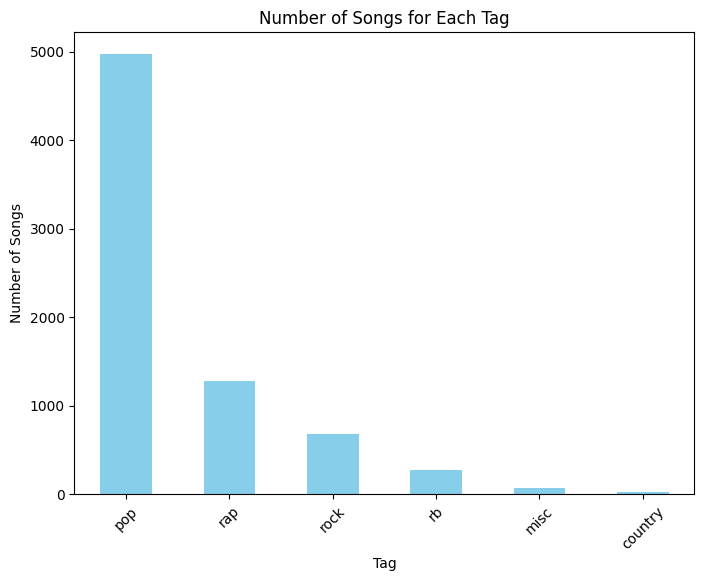

In [15]:
# tag/genre counts
tag_counts = df['tag'].value_counts()
print(tag_counts)

plt.figure(figsize=(8, 6))
tag_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs for Each Tag')
plt.xlabel('Tag')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

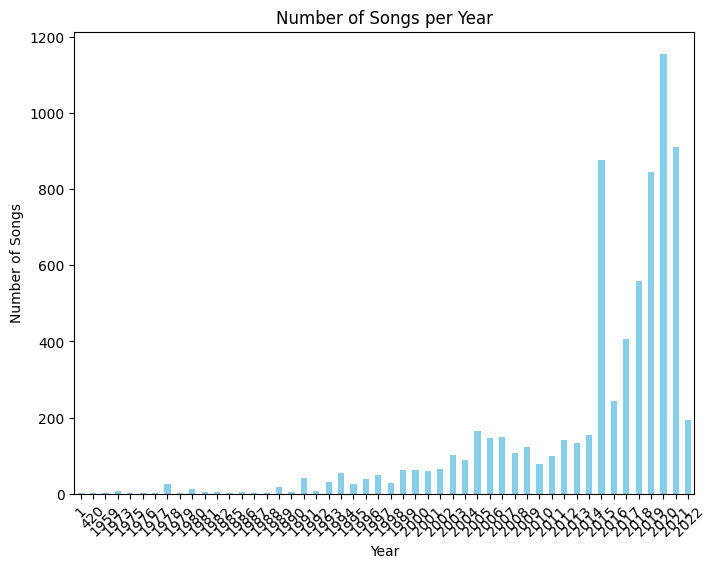

In [28]:
# Count the number of songs for each year
year_counts = df['year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

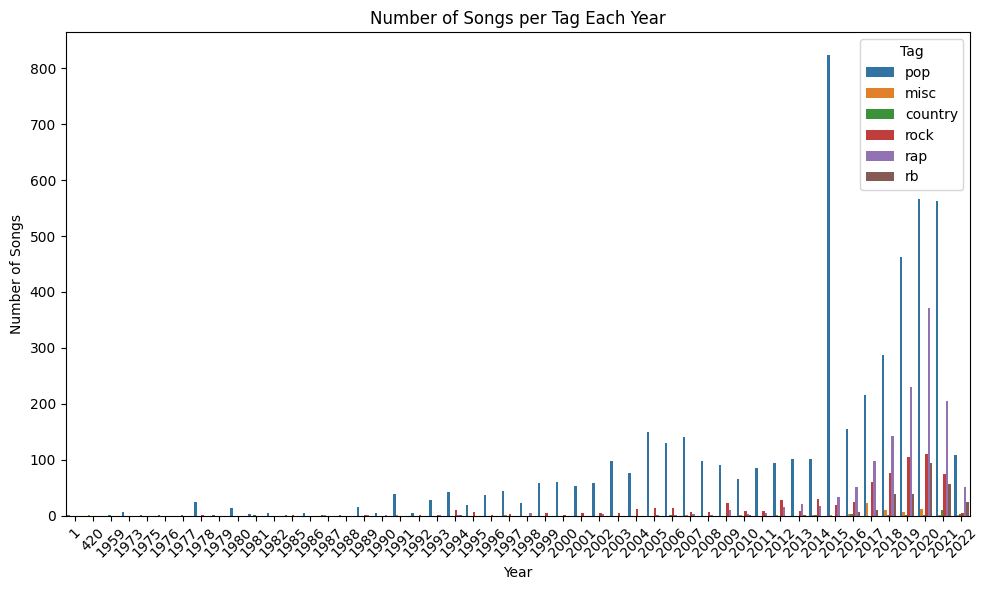

In [32]:
# Plot the side-by-side countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='tag')
plt.title('Number of Songs per Tag Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Tag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Song lengths**

Average song length:  133.78
tag
country    115.892857
misc       109.268657
pop        108.530879
rap        246.517647
rb         159.970696
rock        99.491150
Name: lyric_length, dtype: float64


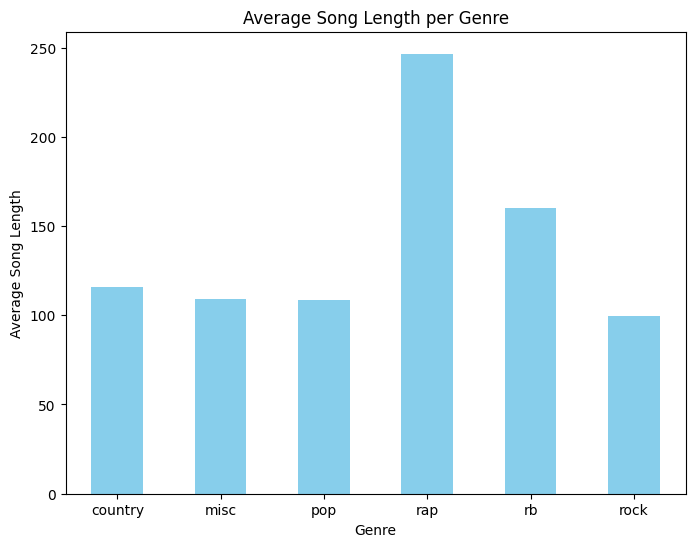

In [23]:
# Compute the length of each lyric
df['lyric_length'] = df['lyrics'].apply(lambda x: len(x.split()))

average_song_length = df['lyric_length'].mean()
print("Average song length: ", float(f"{average_song_length:.2f}"))

average_lyric_length_per_tag = df.groupby('tag')['lyric_length'].mean()
print(average_lyric_length_per_tag)

# Plot the bar graph
plt.figure(figsize=(8, 6))
average_lyric_length_per_tag.plot(kind='bar', color='skyblue')
plt.title('Average Song Length per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Song Length')
plt.xticks(rotation=0)
plt.show()